File to train the UNet on the virtual machine on the whole dataset

In [1]:
import torch
from torch.utils.data import DataLoader, random_split
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim
from utils.dataset import CocoDataset
from utils.plots import plot_l, plot_model_pred, plot_losses
from utils.models import UNet, save_model, load_model
from utils.metrics import evaluate_model
from utils.training import train_cnn, load_losses

device = "cuda" if torch.cuda.is_available() else "cpu"
height, width = 256, 256
path_vm = "/home/default/coco/train/"
transform = transforms.Compose([
    transforms.Resize((height, width)),
    transforms.ToTensor(),
])
dataset = CocoDataset(root=path_vm, transform=transform)
NUM_EPOCHS = 20

/home/default/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Found 82783 images.


In [2]:
torch.manual_seed(42)
test_size = int(0.2 * len(dataset))
train_size = len(dataset) - test_size
train, test = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train, batch_size=64, shuffle=True)
test_loader = DataLoader(test, batch_size=64, shuffle=False)

# L1 Smooth

In [3]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion3 = nn.SmoothL1Loss()

In [4]:
torch.manual_seed(42)
train_losses_l1smooth, test_losses_l1smooth = train_cnn(NUM_EPOCHS, model, criterion3, optimizer, train_loader, test_loader, device,
                                                        save_losses=True, save_checkpoints=True, file_name="unet_l1smooth")
# machine disconnected so outputs are not saved, but files are.

Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 1, Train Loss: 0.0021416322447377558, Validation Loss: 0.0015163392023611311


Testing: 100%|██████████| 259/259 [05:57<00:00,  1.38s/it]


Epoch 2, Train Loss: 0.001500509013613047, Validation Loss: 0.0014681374913973295


Testing: 100%|██████████| 259/259 [05:48<00:00,  1.34s/it]


Epoch 3, Train Loss: 0.0014624735089648821, Validation Loss: 0.0014502496569162113


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 4, Train Loss: 0.0014332833572781244, Validation Loss: 0.0014249084793340459


Testing: 100%|██████████| 259/259 [05:51<00:00,  1.36s/it]


Epoch 5, Train Loss: 0.0014038578019441434, Validation Loss: 0.0014107310281469554


Testing: 100%|██████████| 259/259 [05:52<00:00,  1.36s/it]


Epoch 6, Train Loss: 0.0013777357410270595, Validation Loss: 0.0013752617697055276
Model saved to models/unet_l1smooth_6.pth successfully!


Testing: 100%|██████████| 259/259 [05:56<00:00,  1.38s/it]


Epoch 7, Train Loss: 0.0013584963549918311, Validation Loss: 0.0013808401334764703


Epoch 8/20:  36%|███▋      | 376/1035 [09:11<14:59,  1.37s/it]Bad pipe message: %s [b'\x96\xfej[\xe9\xf8pH\xb1|\xb6dv\xb2|\xe2\xfc\xe5 \x08M\x1c\x06\xb9C\xe2o\xe6\xf17\x8e\x92\x9d']
Bad pipe message: %s [b'\xb4\x0e\x82\xb88\xbcK\x95\x91\xae:\xb8\xbe\xed\x06\xb9\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x00\x1e\x00\x1c\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08', b'\x0b\x08\x04\x08\x05\x08\x06\x04\x01']
Bad pipe message: %s [b'\xd4s\x10o\x8b\x12J,\xf9\x7fus\x81\xd6\x1f\x1b\xda\xa6 \xe1\xfeT\x9c3\xf4\xacW?\xe3 C\x99Y\xa2\r\xea\x02b B\x05$\x00\xd9\xa2\xb4\xaa\xee\x92\xa1>\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.', b'1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x0

Epoch 8, Train Loss: 0.0013395350336452613, Validation Loss: 0.0013571645400188431


Testing: 100%|██████████| 259/259 [05:26<00:00,  1.26s/it]


Epoch 9, Train Loss: 0.0013243054824314364, Validation Loss: 0.0013333443567088471


Testing: 100%|██████████| 259/259 [05:26<00:00,  1.26s/it]


Epoch 10, Train Loss: 0.001309699728153646, Validation Loss: 0.00139328113597059


Testing: 100%|██████████| 259/259 [05:23<00:00,  1.25s/it]


Epoch 11, Train Loss: 0.001299389639975062, Validation Loss: 0.001318737047564411


Epoch 12/20:  45%|████▌     | 466/1035 [10:03<12:28,  1.32s/it]

In [ ]:
save_model(model, "unet_l1smooth_trained")

In [3]:
model = load_model(UNet(), "/home/default/image-colorization/models/unet_l1smooth_trained.pth").to(device)
train_losses_l1smooth, test_losses_l1smooth = load_losses("/home/default/image-colorization/losses/unet_l1smooth.txt")

UNet model loaded successfully!


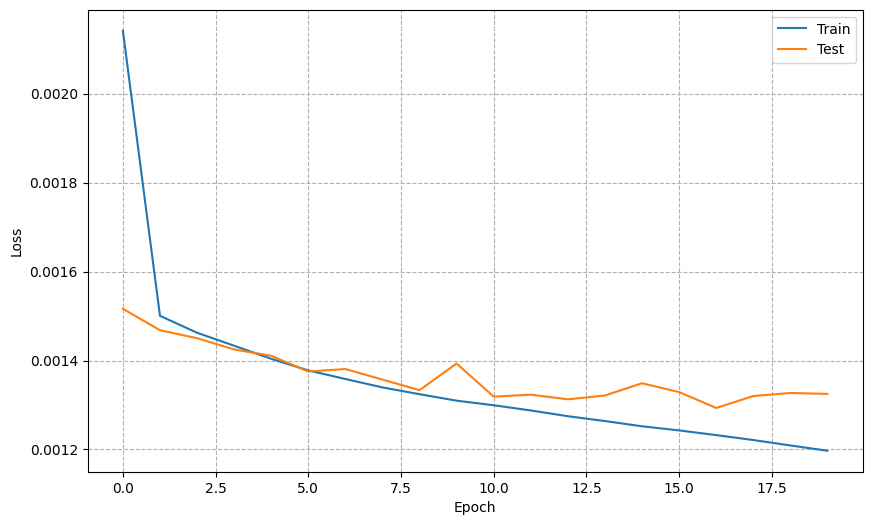

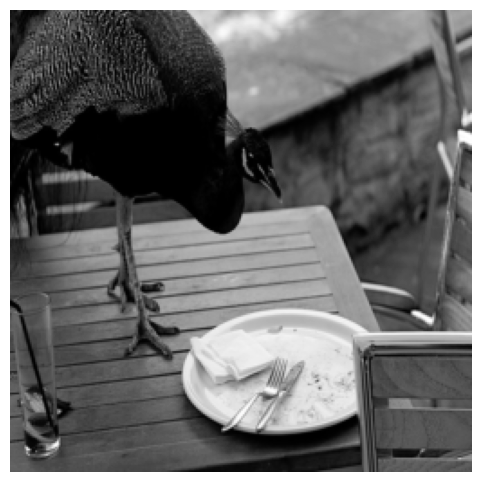

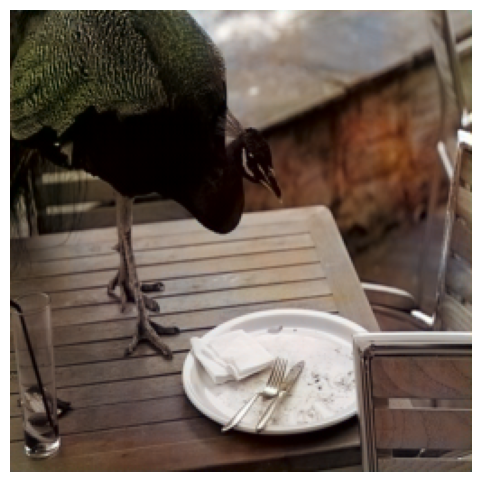

In [7]:
plot_losses(train_losses_l1smooth, test_losses_l1smooth)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [6]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

Average MSE, STD: 0.0026, 0.0003
Average PSNR, STD: 51.6279, 1.1127
Average SSIM, STD: 0.8165, 0.0916
FID: 7.4200


# L1 Loss

In [7]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion2 = nn.L1Loss()

In [8]:
torch.manual_seed(42)
train_losses_l1, test_losses_l1 = train_cnn(NUM_EPOCHS, model, criterion2, optimizer, train_loader, test_loader, device,
                                            save_losses=True, save_checkpoints=True, file_name="unet_l1")

Epoch 1/20:  85%|████████▍ | 875/1035 [19:28<03:35,  1.35s/it]Bad pipe message: %s [b"\xcb^\x9c\xb5\xb8\x86\xbf\x05ep\xe5\xc6\xfa$\xbd\xdd4\xa3 \xa2\x85'|\xbat\x04 \xc0g\x9f&\xed\xe3\xda\xb8\xf2\xc8\x84\x89\x8c\x1c\xebu\xe4\xc6\x84\xb3\x01\x9b8\xcb\x00\x08\x13\x02\x13\x03\x13\x01\x00\xff\x01\x00\x00\x8f\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00"]
Bad pipe message: %s [b"\xa9\xc8\x88\xee\xbf\xe5\xf9T\x83/q\xcdLW\xd5\xce\xc9\xb0\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0

Epoch 1, Train Loss: 0.04308016008297026, Validation Loss: 0.03650544876498835


Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 2, Train Loss: 0.03607491049285672, Validation Loss: 0.03559476915301043


Testing: 100%|██████████| 259/259 [05:56<00:00,  1.38s/it]


Epoch 3, Train Loss: 0.03547012034965598, Validation Loss: 0.03547689817759521


Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 4, Train Loss: 0.03504699462313871, Validation Loss: 0.0349685606118795


Testing: 100%|██████████| 259/259 [05:50<00:00,  1.35s/it]


Epoch 5, Train Loss: 0.034711925411857844, Validation Loss: 0.03461983630210737


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.36s/it]


Epoch 6, Train Loss: 0.03439548786207674, Validation Loss: 0.03434658208754072
Model saved to models/unet_l1_6.pth successfully!


Testing: 100%|██████████| 259/259 [06:02<00:00,  1.40s/it]


Epoch 7, Train Loss: 0.03415933245082121, Validation Loss: 0.03419293199295473


Testing: 100%|██████████| 259/259 [05:52<00:00,  1.36s/it]


Epoch 8, Train Loss: 0.03392956790824731, Validation Loss: 0.034458217149938394


Testing: 100%|██████████| 259/259 [05:56<00:00,  1.38s/it]


Epoch 9, Train Loss: 0.0337293522513431, Validation Loss: 0.033836891507895296


Testing: 100%|██████████| 259/259 [06:03<00:00,  1.40s/it]


Epoch 10, Train Loss: 0.03356918890551092, Validation Loss: 0.03396983949546648


Testing: 100%|██████████| 259/259 [06:11<00:00,  1.44s/it]


Epoch 11, Train Loss: 0.033410815795622585, Validation Loss: 0.03348024782785808


Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 12, Train Loss: 0.03324636748231551, Validation Loss: 0.033661204904432925
Model saved to models/unet_l1_12.pth successfully!


Testing: 100%|██████████| 259/259 [06:01<00:00,  1.40s/it]


Epoch 13, Train Loss: 0.03308956200517894, Validation Loss: 0.033372855756043464


Testing: 100%|██████████| 259/259 [06:02<00:00,  1.40s/it]


Epoch 14, Train Loss: 0.032928965814807566, Validation Loss: 0.03344312818670595


Testing: 100%|██████████| 259/259 [05:59<00:00,  1.39s/it]


Epoch 15, Train Loss: 0.03277353842693251, Validation Loss: 0.03344981368041407


Testing: 100%|██████████| 259/259 [05:54<00:00,  1.37s/it]


Epoch 16, Train Loss: 0.03265353018498939, Validation Loss: 0.03342382080536552


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.37s/it]


Epoch 17, Train Loss: 0.03249809028229852, Validation Loss: 0.03314761166608241


Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 18, Train Loss: 0.032353197380108535, Validation Loss: 0.03315096666396355


Testing: 100%|██████████| 259/259 [05:58<00:00,  1.39s/it]


Epoch 19, Train Loss: 0.032202135071446356, Validation Loss: 0.03328245375521165


Testing: 100%|██████████| 259/259 [05:50<00:00,  1.35s/it]

Epoch 20, Train Loss: 0.032065426713026667, Validation Loss: 0.03330292329048328
Model saved to models/unet_l1_20.pth successfully!
Losses saved to losses/unet_l1.txt
Finished Training


In [9]:
save_model(model, "unet_l1_trained")

Model saved to models/unet_l1_trained.pth successfully!


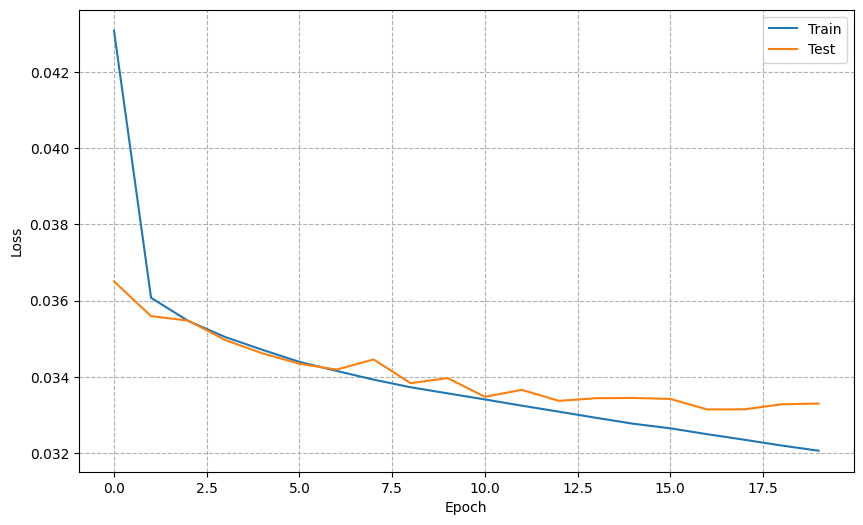

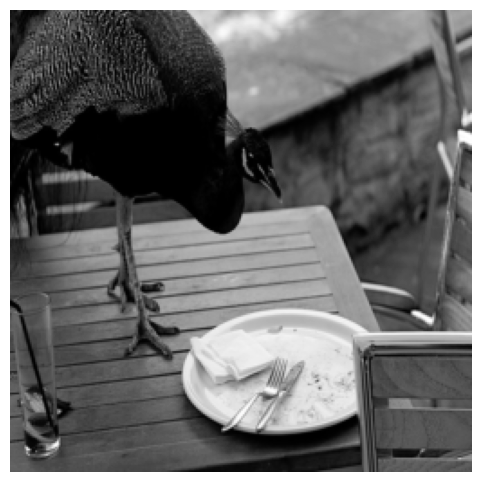

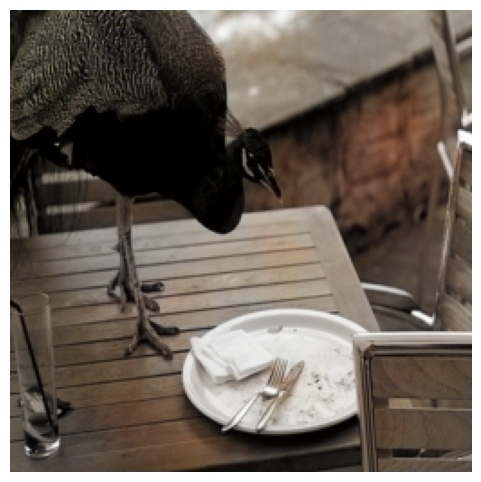

In [10]:
plot_losses(train_losses_l1, test_losses_l1)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [11]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

Average MSE, STD: 0.0027, 0.0004
Average PSNR, STD: 51.3193, 1.1742
Average SSIM, STD: 0.8193, 0.0969
FID: 7.9728


# MSE Loss

In [12]:
torch.manual_seed(42)
model = UNet().to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion1 = nn.MSELoss()

In [13]:
torch.manual_seed(42)
train_losses_mse, test_losses_mse = train_cnn(NUM_EPOCHS, model, criterion1, optimizer, train_loader, test_loader, device,
                                              save_losses=True, save_checkpoints=True, file_name="unet_mse")

Testing: 100%|██████████| 259/259 [05:55<00:00,  1.37s/it]


Epoch 1, Train Loss: 0.004283684048945633, Validation Loss: 0.0030350662205138146


Testing: 100%|██████████| 259/259 [05:53<00:00,  1.37s/it]


Epoch 2, Train Loss: 0.003001154060722981, Validation Loss: 0.0029400556310507898


Testing: 100%|██████████| 259/259 [05:58<00:00,  1.38s/it]


Epoch 3, Train Loss: 0.0029249410320451295, Validation Loss: 0.0029075877133282226


Epoch 4/20:  74%|███████▍  | 771/1035 [18:50<06:21,  1.45s/it]Bad pipe message: %s [b"\xa4zY\xa5\xcbg\x07\x8e\x8e\xd7\x8e/\x1b\xfa3\xf9J\x17\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03\x05\x03\x06\x03\x08\x07\x08\x08\x08\t\x08\n\x08\x0b\x08\x04\x08\x05\x08\x06\x04", b'', b'']
Bad pipe message: %s [b'', b'\x03\x03']
Bad pipe message: %s [b'']
Bad pipe message: %s [b'', b'\x02']
Bad pipe message: %s [b'\x05\x02\x0

Epoch 4, Train Loss: 0.0028655704772234825, Validation Loss: 0.002854232261007702


Testing: 100%|██████████| 259/259 [05:54<00:00,  1.37s/it]


Epoch 5, Train Loss: 0.002805135035459942, Validation Loss: 0.0028162613155097347


Testing: 100%|██████████| 259/259 [05:25<00:00,  1.26s/it]


Epoch 6, Train Loss: 0.0027533456118516444, Validation Loss: 0.0027556590067086073
Model saved to models/unet_mse_6.pth successfully!


Testing: 100%|██████████| 259/259 [05:23<00:00,  1.25s/it]


Epoch 7, Train Loss: 0.0027144882615412706, Validation Loss: 0.002746887200307029


Epoch 8/20:  14%|█▍        | 143/1035 [03:08<19:53,  1.34s/it]

In [ ]:
save_model(model, "unet_mse_trained")

In [ ]:
plot_losses(train_losses_mse, test_losses_mse)
plot_l(dataset[76543][1])
plot_model_pred(dataset[76543][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")

# Continue Training

Here we continue the training of the L1 Smooth, which was the best both visually and metrics-wise.

In [ ]:
torch.manual_seed(42)
# we start the model trained already on 20 epochs
ADDITIONAL_EPOCHS = 10 
model = load_model(UNet(), "/home/default/image-colorization/models/unet_l1smooth_trained.pth").to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-4, betas=(0.9, 0.999))
criterion3 = nn.SmoothL1Loss()

In [ ]:
torch.manual_seed(42)
train_losses_l1smooth_round2, test_losses_l1smooth_round2 = train_cnn(ADDITIONAL_EPOCHS, model, criterion3, optimizer, train_loader, test_loader, device,
                                                                      save_losses=True, save_checkpoints=True, file_name="unet_l1smooth_round2")

In [ ]:
save_model(model, "unet_l1smooth_round2_trained")

In [ ]:
plot_losses(train_losses_l1smooth_round2, test_losses_l1smooth_round2)
plot_l(dataset[7653][1])
plot_model_pred(dataset[7653][1], model, device)

In [ ]:
torch.manual_seed(42)
avg_mse, std_mse, avg_psnr, std_psnr, avg_ssim, std_ssim, fid = evaluate_model(model, test_loader, device)
print(f"Average MSE, STD: {avg_mse:.4f}, {std_mse:.4f}")
print(f"Average PSNR, STD: {avg_psnr:.4f}, {std_psnr:.4f}")
print(f"Average SSIM, STD: {avg_ssim:.4f}, {std_ssim:.4f}")
print(f"FID: {fid:.4f}")